In [21]:
import mplfinance as mpf
import pandas as pd
import ta
import optuna
import time
import numpy as np
from multiprocessing import Pool
from itertools import combinations, chain
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
import matplotlib.pyplot as plt
from utils_try import candle_chart
from utils_try import file_features
from utils_try import buy_signals
from utils_try import sell_signals
from utils_try import plot_buy_sell_signals
from utils_try import backtest
from utils_try import data_fun
from utils_try import plot_operations_history
from utils_try import port_value_plot
from utils_try import plot_cash
from utils_try import cash_portvalue_plot

In [22]:
file_path = "data/aapl_1d_test.csv"
# explicar el data set
data_1m_test = pd.read_csv(file_path)
data_1m_test = data_1m_test.dropna()

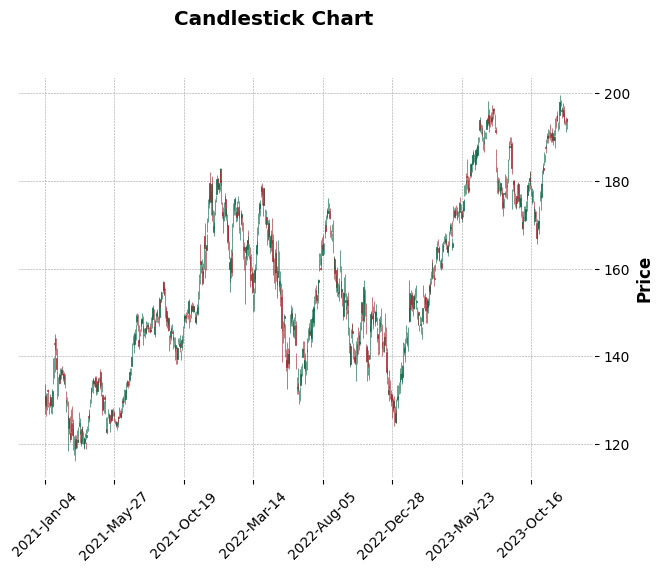

In [23]:
# grafica de vela del precio close sin hacer nada
candle_test = candle_chart(file_path)

In [24]:
# variables que usamos para la prediccion
data_test_long = file_features(data_1m_test, ds_type="buy")
data_test_buy = file_features(data_1m_test, ds_type="sell")

In [25]:
# dataframes de senales de compra
global_buy_signals = buy_signals(data_test_long)
global_sell_signals = sell_signals(data_test_buy)

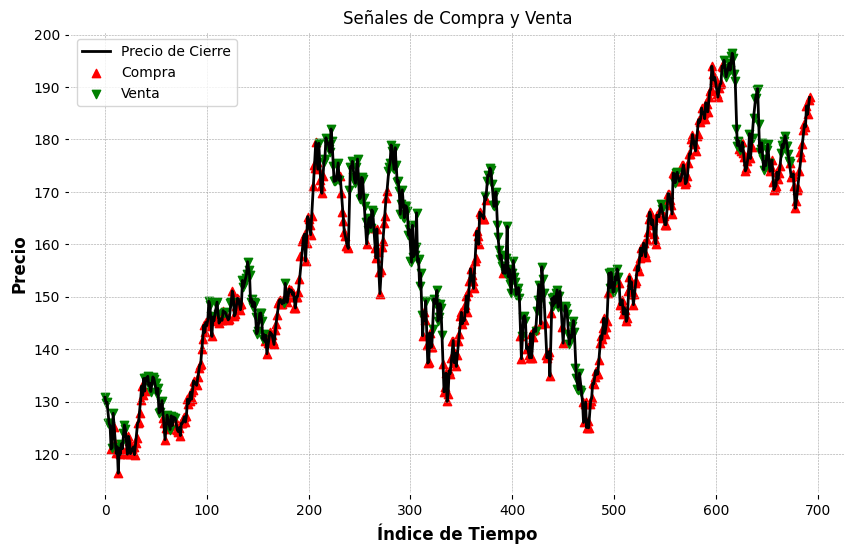

In [26]:
# grafica de compra venta conforme al precio de cierre
plot_buy_sell_signals(global_buy_signals, global_sell_signals, data_test_long)

In [27]:
#data para el backtest
data_1m = data_fun(file_path)

In [28]:
# valores del portafolio, dinero y parametros
portfolio_values, cash_values, operations_history,  = backtest(data_1m, global_buy_signals["predicciones_xgboost"], global_sell_signals["predicciones_xgboost"], 0.88, 1.05, 39)

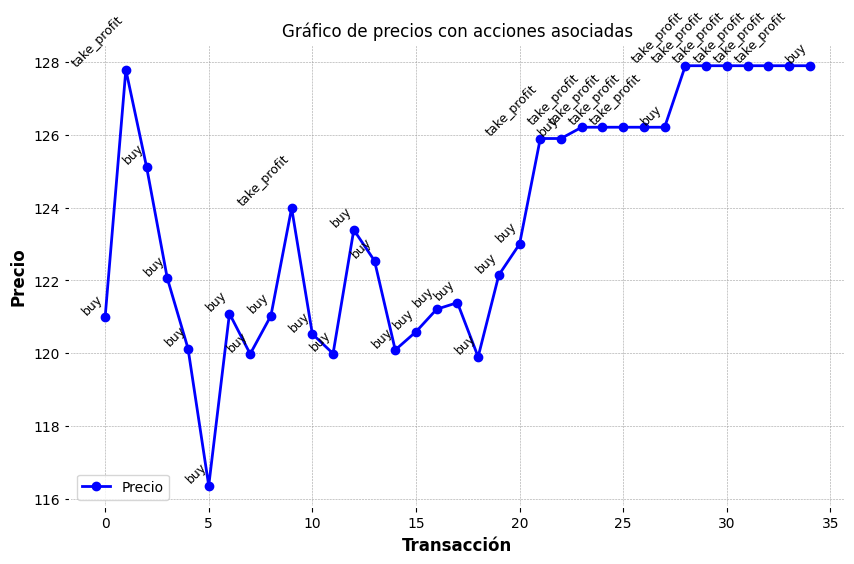

In [29]:
# grafica con las operaciones
plot_operations = plot_operations_history(operations_history)

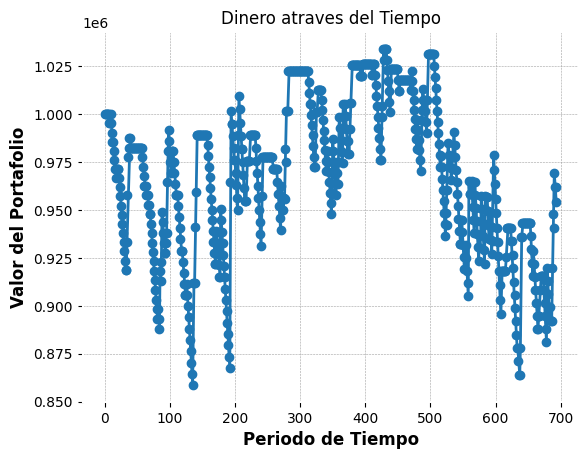

In [30]:
# grafica con el dinero atraves del tiempo
cash_plot = plot_cash(cash_values)

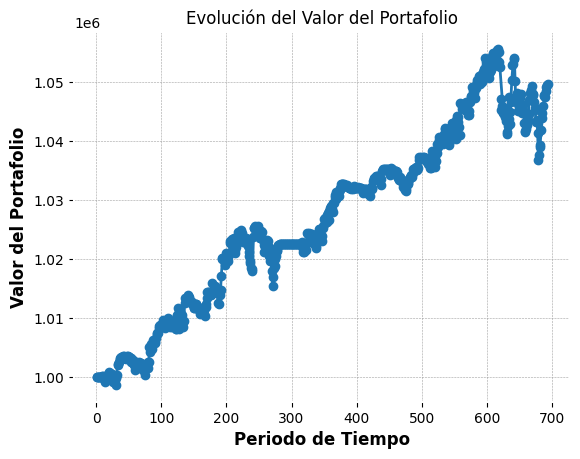

In [31]:
#grafica con el valor del portafolio atraves del tiempo
plot_port_value = port_value_plot(portfolio_values)

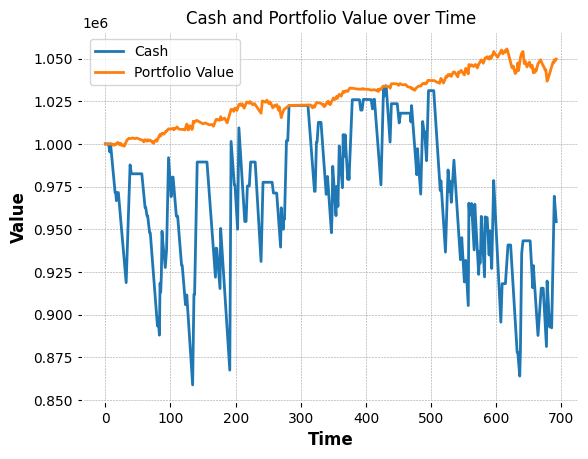

In [32]:
# grafica comparando el dinero con el portafolio
cash_port = cash_portvalue_plot(cash_values, portfolio_values)